<a href="https://colab.research.google.com/github/sambonuruddeen/Covid19-Hack/blob/main/Covid19Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [ ]:
test_images = '/content/drive/My Drive/Colab Notebooks/AI4COVID-19 Hackathon Dataset/Test/Negatives'
train_images = '/content/drive/My Drive/Colab Notebooks/AI4COVID-19 Hackathon Dataset/Train'
val_images  = '/content/drive/My Drive/Colab Notebooks/AI4COVID-19 Hackathon Dataset/Validation'

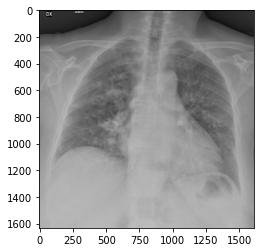

In [ ]:
nt = '/content/drive/My Drive/Colab Notebooks/AI4COVID-19 Hackathon Dataset/Train/Negatives/ARDSSevere.png'
pt = '/content/drive/My Drive/Colab Notebooks/AI4COVID-19 Hackathon Dataset/Train/Positives/03BF7561-A9BA-4C3C-B8A0-D3E585F73F3C.jpeg'
img = mpimg.imread(pt)
#imgplot = plt.imshow(img, cmap = 'gray')
imgplot = plt.imshow(img)





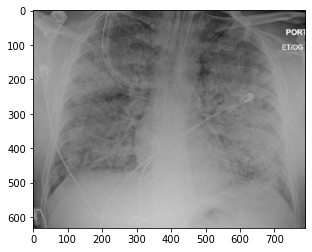

In [ ]:
#Image of Normal X-Ray

img = mpimg.imread(nt)
imgplot = plt.imshow(img)

In [ ]:
#Peprocessing and Augmenting Dataset Images 

#import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMG_SIZE = (64, 64)
datagen = ImageDataGenerator(samplewise_center=True, 
                              samplewise_std_normalization=True, 
                              horizontal_flip = True, 
                              vertical_flip = False, 
                              height_shift_range= 0.05, 
                              width_shift_range=0.1, 
                              rotation_range=5, 
                              shear_range = 0.1,
                              fill_mode = 'reflect',
                              zoom_range=0.15)


train_generator = datagen.flow_from_directory(
        train_images,
        target_size=IMG_SIZE,
        color_mode = 'grayscale',
        batch_size=4,
        class_mode='binary')

x_val, y_val = next(datagen.flow_from_directory(
        val_images,
        target_size=IMG_SIZE,
        color_mode = 'grayscale',
        batch_size=4,
        class_mode='binary')) # one big batch

x_test, y_test = next(datagen.flow_from_directory(
        test_images,
        target_size=IMG_SIZE,
        color_mode = 'grayscale',
        batch_size=40,
        class_mode='binary')) # one big batch


Found 167 images belonging to 2 classes.
Found 39 images belonging to 2 classes.
Found 40 images belonging to 1 classes.


In [ ]:

#Convolutional Neural Network Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten

model = Sequential()
model.add(Conv2D(32, (3, 3), activation="relu", input_shape=x_test.shape[1:]))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
                           metrics = ['binary_accuracy', 'mae'])
model.summary()


ERROR! Session/line number was not unique in database. History logging moved to new session 61
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               802944    
___________________________

In [ ]:

#ModelCheckpoint To Save Best Weights and EarlyStopping to Stop Training When Training Stops Improving

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
weight_path="{}_weights.best.hdf5".format('pneumonia_cnn')

checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, 
                             save_best_only=True, mode='min', save_weights_only = True)

early = EarlyStopping(monitor="val_loss", 
                      mode="min", 
                      patience=5)
callbacks_list = [checkpoint, early]


In [ ]:

#Training The Convolutional Neural Network with The Training Data (First Round)

#First Round 
model.fit_generator(train_generator, 
                    steps_per_epoch=100, 
                    validation_data = (x_val, y_val), 
                    epochs = 1, 
                    callbacks = callbacks_list)

# Save the entire model as a SavedModel
model.save('Covid19_cnn2') 

Instructions for updating:
Please use Model.fit, which supports generators.
100/100 [==============================] - ETA: 0s - loss: 0.6978 - binary_accuracy: 0.7060 - mae: 0.4082
Epoch 00001: val_loss improved from inf to 0.59028, saving model to pneumonia_cnn_weights.best.hdf5
100/100 [==============================] - 76s 758ms/step - loss: 0.6978 - binary_accuracy: 0.7060 - mae: 0.4082 - val_loss: 0.5903 - val_binary_accuracy: 0.7500 - val_mae: 0.4060
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: Covid19_cnn2/assets


In [ ]:
#Evaluating The Convolutional Neural Network With Validation Data 

scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("val_loss:", scores[0])
print("val_mean_absolute_error:", scores[2])



1/1 [==============================] - 0s 2ms/step - loss: 1.2259 - binary_accuracy: 0.0000e+00 - mae: 0.7061
binary_accuracy: 0.00%
val_loss: 1.225880742073059
val_mean_absolute_error: 0.7061028480529785


In [ ]:
#Training The Convolutional Neural Network with The Training Data (Continuation)

# Continued Training
model.fit_generator(train_generator, 
                    steps_per_epoch=100, 
                    validation_data = (x_val, y_val), 
                    epochs = 11, 
                    callbacks = callbacks_list)

Epoch 1/11
100/100 [==============================] - ETA: 0s - loss: 0.5841 - binary_accuracy: 0.7261 - mae: 0.3933
Epoch 00001: val_loss improved from 0.59028 to 0.59004, saving model to pneumonia_cnn_weights.best.hdf5
100/100 [==============================] - 21s 207ms/step - loss: 0.5841 - binary_accuracy: 0.7261 - mae: 0.3933 - val_loss: 0.5900 - val_binary_accuracy: 0.7500 - val_mae: 0.4100
Epoch 2/11
100/100 [==============================] - ETA: 0s - loss: 0.5517 - binary_accuracy: 0.7531 - mae: 0.3628
Epoch 00002: val_loss did not improve from 0.59004
100/100 [==============================] - 19s 194ms/step - loss: 0.5517 - binary_accuracy: 0.7531 - mae: 0.3628 - val_loss: 0.6248 - val_binary_accuracy: 0.7500 - val_mae: 0.4320
Epoch 3/11
100/100 [==============================] - ETA: 0s - loss: 0.5508 - binary_accuracy: 0.7412 - mae: 0.3691
Epoch 00003: val_loss did not improve from 0.59004
100/100 [==============================] - 21s 207ms/step - loss: 0.5508 - binary_a

In [ ]:
#Load the Best Weights and Evaluate The Trained Convolutional Neural Network

model.load_weights(weight_path)
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print("val_loss:", scores[0])
print("val_mean_absolute_error:", scores[2])



1/1 [==============================] - 0s 1ms/step - loss: 1.1800 - binary_accuracy: 0.0000e+00 - mae: 0.6921
binary_accuracy: 0.00%
val_loss: 1.1799975633621216
val_mean_absolute_error: 0.6920856237411499


In [ ]:
import os
filelist=os.listdir(test_images)
#for fichier in filelist[:]: # filelist[:] makes a copy of filelist.
    #filelist.remove(fichier)
print(filelist)


['covid-19-pneumonia-23-day3.jpg', 'E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-000-fig1b.png', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '396A81A5-982C-44E9-A57E-9B1DC34E2C08.jpeg', '1.CXRCTThoraximagesofCOVID-19fromSingapore.pdf-002-fig3b.png', '2B8649B2-00C4-4233-85D5-1CE240CF233B.jpeg', '1B734A89-A1BF-49A8-A1D3-66FAFA4FAC5D.jpeg', '23E99E2E-447C-46E5-8EB2-D35D12473C39.png', '41591_2020_819_Fig1_HTML.webp-day5.png', '85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg', '7D2CF6CE-F529-4470-8356-D33FFAF98600.jpeg', '7AF6C1AF-D249-4BD2-8C26-449304105D03.jpeg', '5e6dd879fde9502400e58b2f.jpeg', 'A7E260CE-8A00-4C5F-A7F5-27336527A981.jpeg', 'auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', 'all14238-fig-0001-m-b.jpg', 'ciaa199.pdf-001-a.png', 'covid-19-caso-70-1-L.jpg', 'covid-19-pneumonia-53.jpg', 'covid-19-rapidly-progressive-acute-respiratory-distress-syndrome-ards-admission.jpg', 'covid-19-pneumonia-12.jpg', 'covid-19-pn

In [ ]:
#Use The Trained Convolutional Neural Network for Clasification

final_list = {}
pred_Y = model.predict(x_test, batch_size = 32, verbose = True)

print(pred_Y)




2/2 [==============================] - 0s 7ms/step
[[0.68684536]
 [0.62375665]
 [0.7256807 ]
 [0.64430827]
 [0.71199405]
 [0.7360673 ]
 [0.712448  ]
 [0.72585106]
 [0.63191164]
 [0.6663729 ]
 [0.61322355]
 [0.7500206 ]
 [0.7391817 ]
 [0.6210798 ]
 [0.718216  ]
 [0.7450404 ]
 [0.76732504]
 [0.6191378 ]
 [0.71872073]
 [0.71880585]
 [0.6462925 ]
 [0.6277748 ]
 [0.63714045]
 [0.7942776 ]
 [0.64499193]
 [0.7241496 ]
 [0.6347131 ]
 [0.5628089 ]
 [0.731766  ]
 [0.7348235 ]
 [0.80234075]
 [0.54928565]
 [0.7108866 ]
 [0.7571354 ]
 [0.6350272 ]
 [0.558235  ]
 [0.6877204 ]
 [0.61109364]
 [0.73923445]
 [0.7406275 ]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_ranking.py:808: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


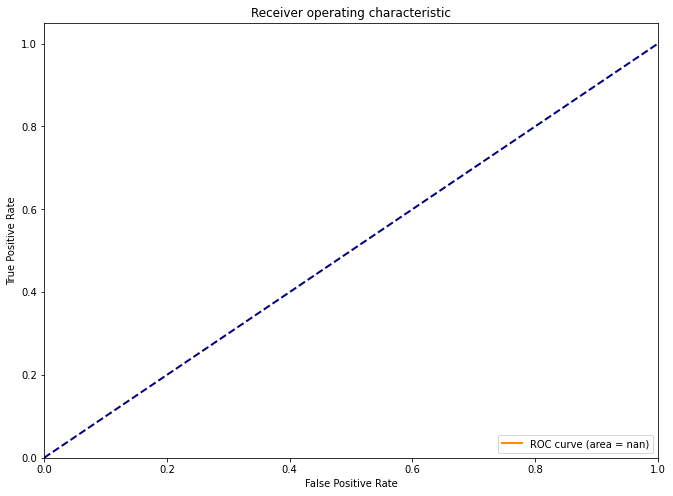

In [ ]:
#ROC Curve and Area Under ROC Curve for Evaluating The Trained Convolutional Neural Network

from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class

num_classes = 0

fpr = dict()
tpr = dict()
roc_auc = dict()
fpr, tpr, _ = roc_curve(y_test, pred_Y)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(11,8))
lw = 2
plt.plot(fpr, tpr, color='darkorange', 
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('roc2.png')